<a href="https://colab.research.google.com/github/shubhigupta991/Data-Science/blob/master/Deep%20Learning/end_to_end_dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data 

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them). 


### Get our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
print('TF version : ', tf.__version__)
print('TF Hub version : ', hub.__version__)

TF version :  2.2.0
TF Hub version :  0.8.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [3]:
labels_csv = pd.read_csv('drive/My Drive/Data Science/labels.csv')
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [4]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     eeb4aa1fdbefcc783845be89b94bdab9  scottish_deerhound
freq                                   1                 126

In [5]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

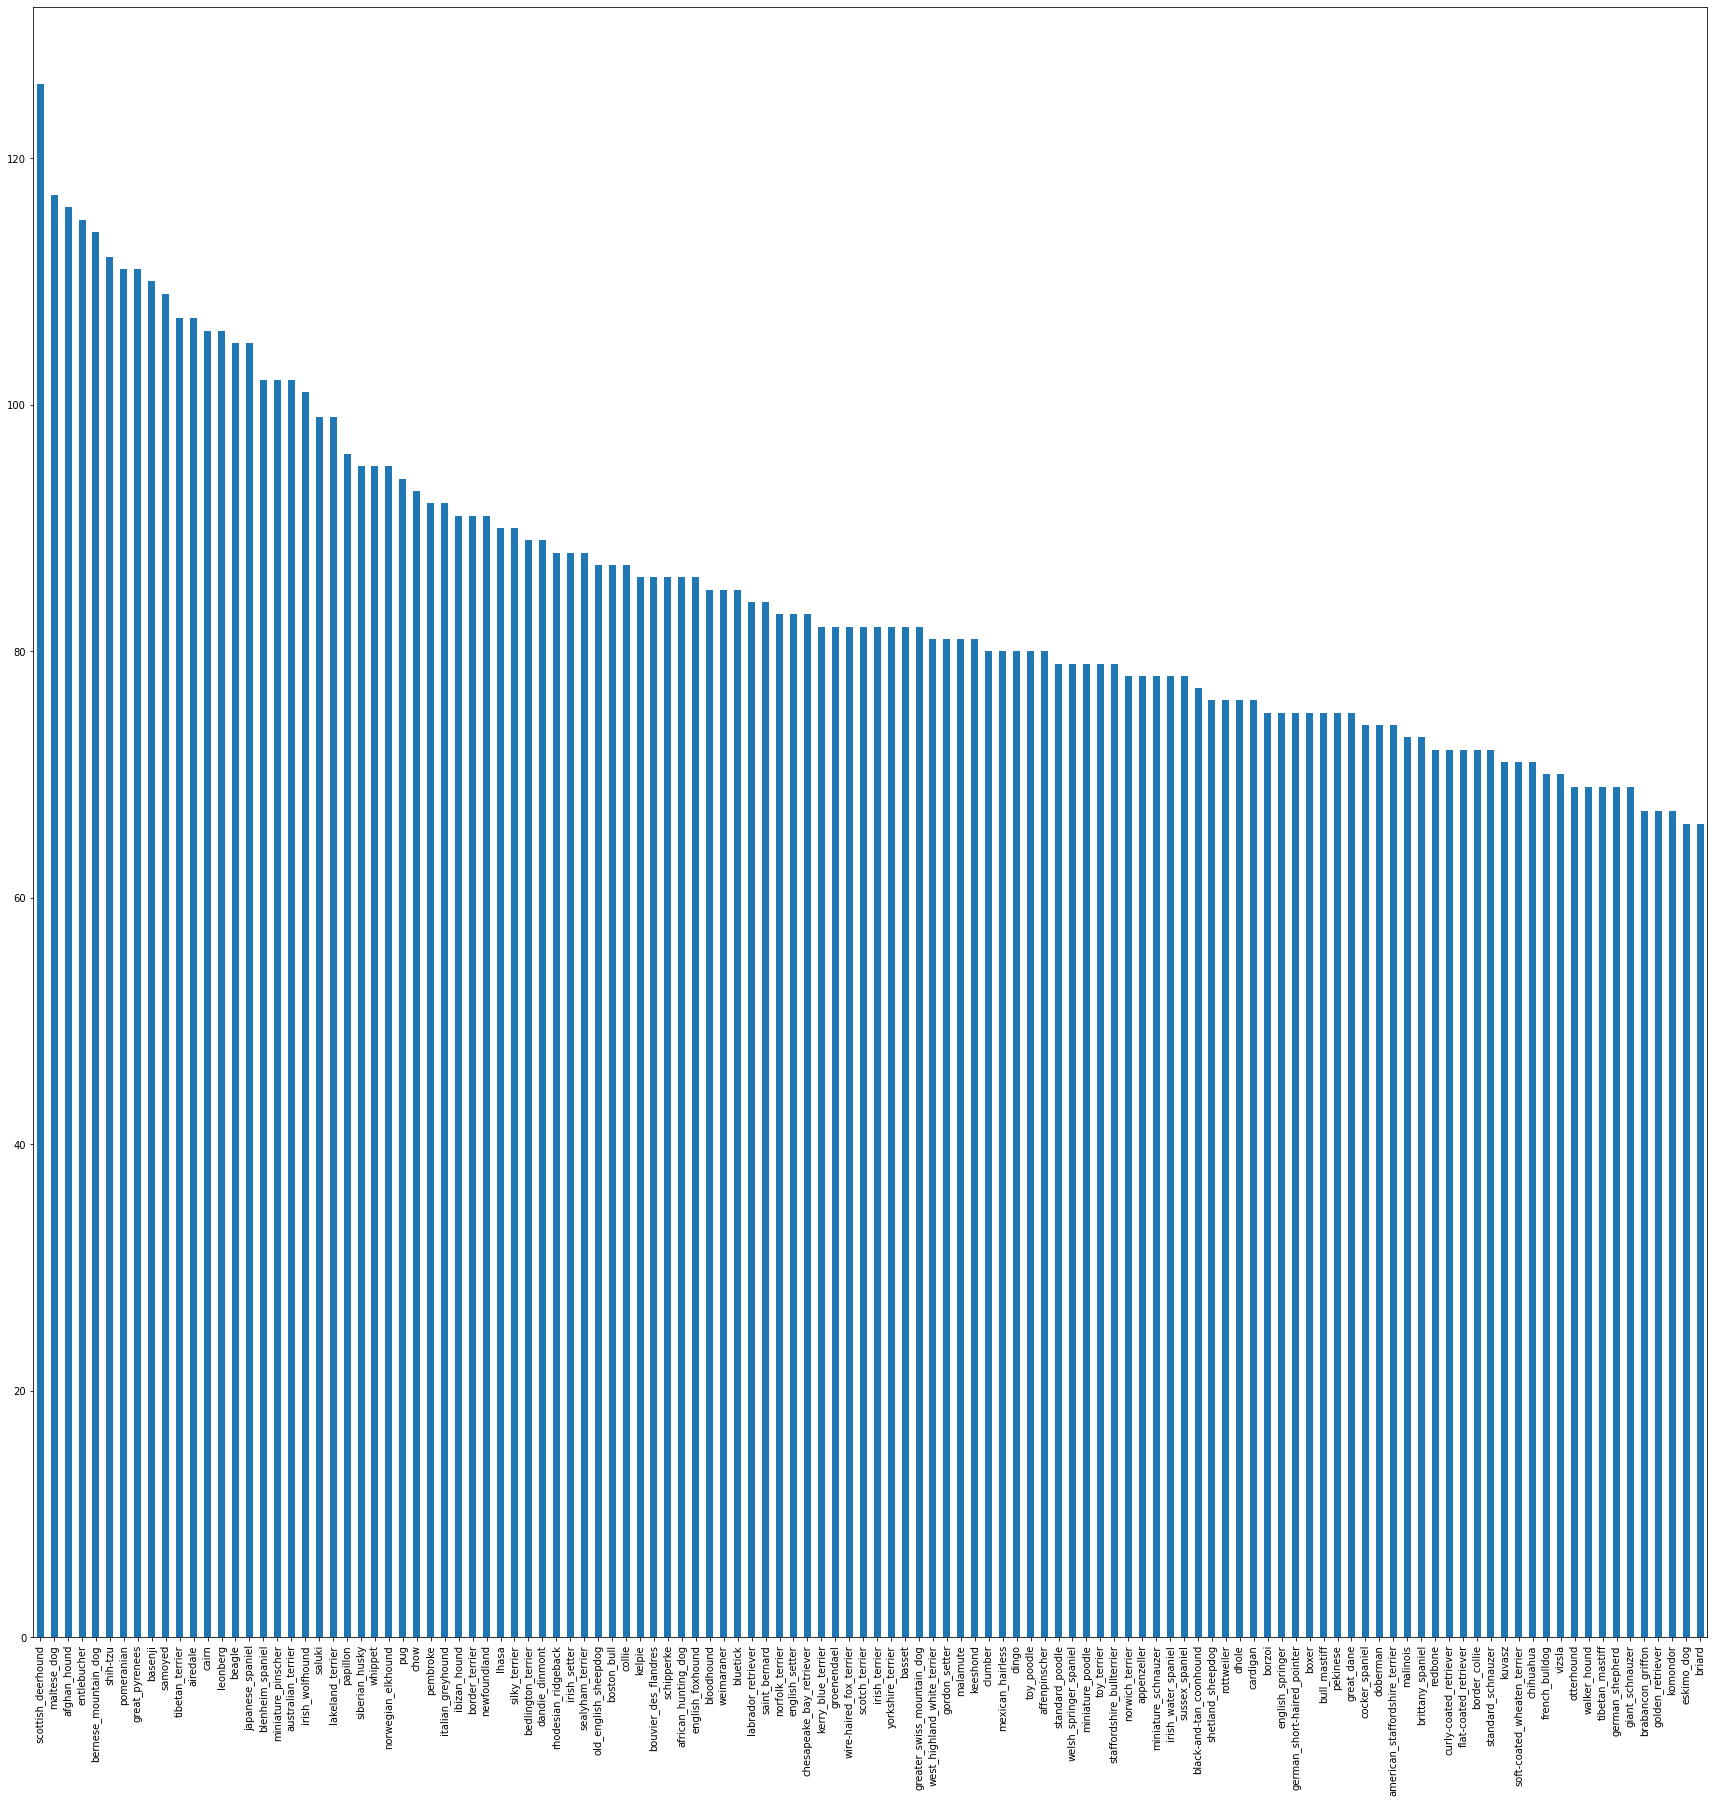

In [6]:
labels_csv['breed'].value_counts().plot.bar(figsize=(30,30))

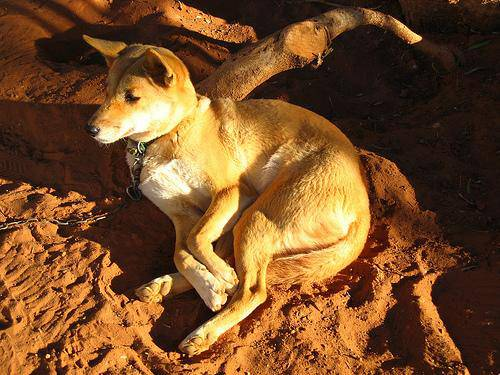

In [7]:
from IPython.display import Image
Image('drive/My Drive/Data Science/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Getting images and their labels 

Let's get a list of all of our image file pathnames.

In [8]:
filenames = ['drive/My Drive/Data Science/train/'+fname+ '.jpg' for fname in labels_csv['id']]

filenames[:10]

['drive/My Drive/Data Science/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Data Science/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Data Science/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Data Science/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Data Science/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Data Science/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Data Science/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Data Science/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Data Science/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Data Science/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

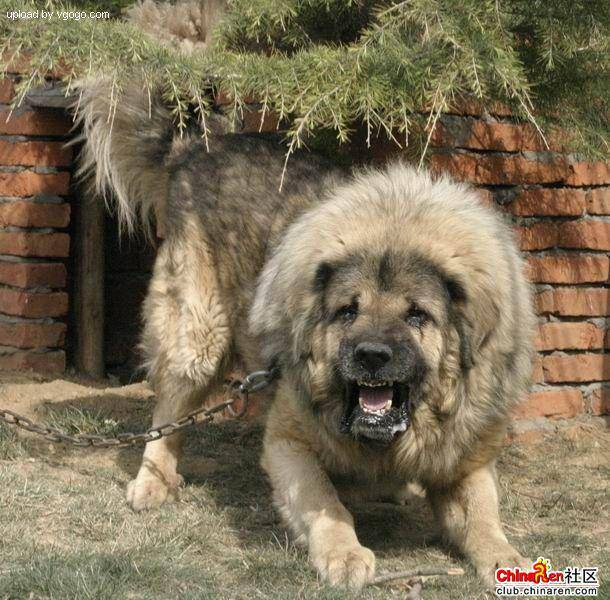

In [9]:
Image(filenames[9000])

In [10]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [11]:
import os
if len(os.listdir('drive/My Drive/Data Science/train/')) == len(filenames):
  print('Filenames match actual amount of Files!!!! Proceed.')
else:
  print('Filenames do not match actual data!! Check the target directory..')

Filenames match actual amount of Files!!!! Proceed.


In [12]:
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [15]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
len(boolean_labels)

10222

In [18]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [19]:
filenames[:10]

['drive/My Drive/Data Science/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Data Science/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Data Science/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Data Science/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Data Science/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Data Science/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Data Science/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Data Science/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Data Science/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Data Science/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [20]:
X = filenames
y = boolean_labels

In [21]:
len(X),len(y)

(10222, 10222)

In [22]:
NUM_IMAGES = 1000 #@param{type:'slider', min:1000, max:10000, step:1000}

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES],
                                                     test_size = 0.2, random_state = 9)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [24]:
X_train[:2],y_train[:2]

(['drive/My Drive/Data Science/train/182c436dd1fbec1c5f4979077ce74659.jpg',
  'drive/My Drive/Data Science/train/145f7bb3bf6e4877b8b6624f612a1c24.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fals

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [25]:
from matplotlib.pyplot import imread
image = imread(filenames[2])
image.shape

(375, 500, 3)

In [26]:
image[:2]

array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]]], dtype=uint8)

In [27]:
image.max(),image.min()

(255, 0)

In [28]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [29]:
IMG_SIZE = 224

def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor. 
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image,size = [img_size, img_size])
  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: 
`(image, label)`.

In [30]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image,label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [31]:
BATCH_SIZE = 32

def create_data_batches(X , y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:
    print('Creating test data batches........')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  elif valid_data:
    print('Creating valid data batches...........')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  
  else:
    print('Creating training data batches...............')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

In [32]:
train_data = create_data_batches(X_train,y_train)
valid_data = create_data_batches(X_val,y_val, valid_data=True)

Creating training data batches...............
Creating valid data batches...........


In [33]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [34]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [35]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [36]:
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(10,10))

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

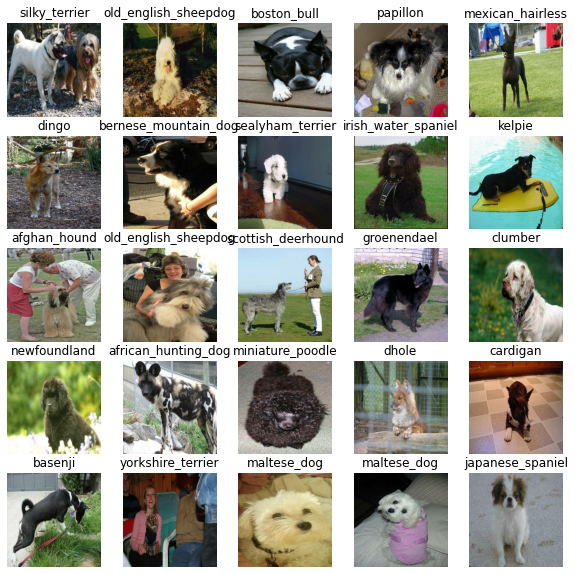

In [37]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

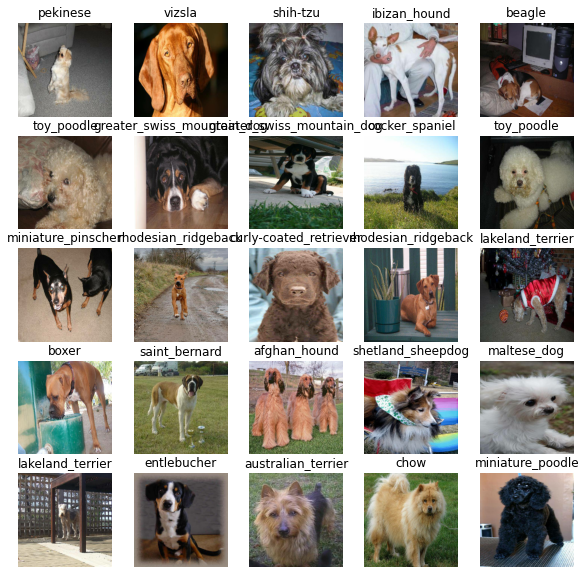

In [38]:
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images,valid_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [39]:
INPUT_SHAPE = [None,224,224,3]

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [40]:
def create_models(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):

  """
  Trains a given model and returns the trained version.
  """

  print('Building a model with :',model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(model_url), #input layer
                               tf.keras.layers.Dense(units = output_shape,
                                                     activation = 'softmax') #output layer
  ])
  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )

  # Build the model
  model.build(input_shape)
  
  return model

In [41]:
model = create_models()

Building a model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension. 
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [42]:
%load_ext tensorboard

In [43]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join('drive/My Drive/Data Science/logs',
                         datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [45]:
NUM_EPOCH = 100 #@param {type:'slider', min:10, max:100, step:10}

In [46]:
def train_model():
  model = create_models()

  tensorboard = create_tensorboard_callback()

  model.fit(x = train_data, epochs = NUM_EPOCH,
            validation_data = valid_data, validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  
  return model

In [47]:
model = train_model()

Building a model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 309s 12s/step - loss: 4.7459 - accuracy: 0.0875 - val_loss: 3.4020 - val_accuracy: 0.2150
Epoch 2/100
25/25 [==============================] - 6s 222ms/step - loss: 1.7255 - accuracy: 0.6550 - val_loss: 2.0529 - val_accuracy: 0.5300
Epoch 3/100
25/25 [==============================] - 6s 228ms/step - loss: 0.5932 - accuracy: 0.9300 - val_loss: 1.5759 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 6s 230ms/step - loss: 0.2547 - accuracy: 0.9900 - val_loss: 1.4233 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 6s 227ms/step - loss: 0.1457 - accuracy: 0.9975 - val_loss: 1.3528 - val_accuracy: 0.6750
Epoch 6/100
25/25 [==============================] - 6s 228ms/step - loss: 0.0997 - accuracy: 1.0000 - val_loss: 1.3083 - val_accuracy: 0.6900
Epoch 7/100
25/25 [===========================

In [48]:
%tensorboard --logdir drive/My\ Drive/Data\ Science/logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [49]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [50]:
predictions = model.predict(valid_data,verbose=1)
predictions

7/7 [==============================] - 1s 142ms/step


array([[2.7905030e-03, 1.4986514e-02, 1.5424477e-05, ..., 8.5316897e-05,
        1.2920903e-04, 7.8116246e-02],
       [4.6585075e-05, 1.2559595e-04, 2.0562859e-04, ..., 1.8728204e-04,
        1.2552705e-05, 1.8413716e-04],
       [3.4984332e-02, 1.4874607e-03, 3.4687986e-05, ..., 5.1046711e-05,
        1.7481390e-04, 2.7288832e-03],
       ...,
       [3.7352525e-02, 2.5159135e-04, 1.6358843e-03, ..., 8.4144913e-02,
        8.7701436e-04, 1.1899395e-01],
       [8.2825689e-04, 3.2393355e-04, 1.1141487e-05, ..., 7.0994070e-06,
        3.6049311e-04, 2.8746168e-04],
       [1.0561118e-05, 4.1382616e-05, 4.3881915e-05, ..., 2.3060851e-05,
        2.1521968e-05, 4.5974305e-04]], dtype=float32)

In [51]:
predictions[0]

array([2.79050297e-03, 1.49865141e-02, 1.54244772e-05, 1.85224580e-05,
       2.22983712e-04, 1.31036926e-04, 6.77615113e-04, 1.78325584e-03,
       3.17249593e-04, 6.75087285e-05, 1.61871758e-05, 1.29462825e-03,
       1.98568174e-04, 8.06142390e-03, 1.15781422e-05, 1.18101725e-05,
       4.58783834e-05, 2.79637839e-04, 1.31753759e-05, 7.40897895e-06,
       3.31766350e-05, 2.19012472e-05, 1.56475042e-04, 1.60720246e-03,
       6.72258204e-04, 8.67709696e-06, 1.76482907e-04, 1.25411651e-04,
       1.31433735e-05, 2.09229998e-02, 2.89646181e-04, 7.89060607e-04,
       1.47838220e-02, 1.24518014e-03, 2.67996627e-04, 9.35304724e-03,
       1.41976652e-05, 1.34258415e-04, 2.19912137e-04, 1.14000909e-06,
       1.42846489e-03, 4.42140436e-06, 1.29657114e-04, 3.50675182e-05,
       4.61167307e-04, 2.74789654e-05, 1.17466459e-06, 1.73082026e-05,
       1.16180399e-05, 9.48520154e-02, 1.48499093e-04, 3.71167880e-05,
       5.21776639e-02, 1.58440719e-06, 2.21383725e-05, 8.16993906e-06,
      

In [52]:
# First prediction
index = 9
print(predictions[index])
print(f'Max value (probability of prediction) : {np.max(predictions[index])}')
print(f'Sum : {np.sum(predictions[index])}')
print(f'Max index : {np.argmax(predictions[index])}')
print(f'Predicted label : {unique_breeds[np.argmax(predictions[index])]}')

[9.6687285e-04 4.8871728e-04 4.6278699e-04 1.6541095e-04 2.6142068e-04
 1.8056666e-05 3.0866754e-04 1.3575914e-04 8.1014783e-05 2.4892559e-04
 3.4855541e-02 2.1916378e-04 6.8806240e-04 3.4162699e-04 9.1990551e-05
 2.2598886e-04 4.5836867e-05 4.8802398e-05 2.3701630e-05 3.5336180e-04
 3.2551555e-04 7.8066299e-04 5.2969751e-04 1.9501727e-05 9.9514647e-05
 2.7562905e-04 2.2834570e-04 1.9853271e-04 1.3390183e-03 4.9669546e-04
 1.2364245e-03 6.9382804e-04 1.3949391e-03 5.5814799e-06 1.0360555e-04
 2.1530606e-03 5.5234932e-04 6.3954561e-05 3.9319377e-04 7.1380229e-05
 1.5549402e-04 1.5881842e-04 3.9008292e-04 2.2224465e-04 1.5566857e-05
 2.8334302e-04 7.0926631e-06 3.3555250e-04 1.1987959e-04 2.5518775e-05
 3.8673272e-05 2.9883120e-04 2.6566093e-04 5.2293806e-05 7.7907884e-05
 2.5837342e-04 1.9011350e-05 9.1769485e-05 4.4669411e-03 1.4046213e-04
 1.3054168e-03 8.0990378e-04 5.7988230e-04 1.1094696e-04 6.3798489e-04
 1.4353915e-03 4.3087851e-04 2.1110209e-04 1.7089880e-04 7.7718876e-05
 1.195

In [53]:
unique_breeds[76]

'miniature_poodle'

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels.

In [54]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

In [55]:
pred1 = get_pred_label(predictions[42])
pred1

'bloodhound'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [56]:
def unbacthify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []

  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images,labels

In [57]:
val_images, val_labels = unbacthify(valid_data)
val_images[0], val_labels[0]

(array([[[0.3918853 , 0.3918853 , 0.36051273],
         [0.43775532, 0.43775532, 0.40638277],
         [0.44351017, 0.44351017, 0.41213763],
         ...,
         [0.05796662, 0.02239764, 0.01937653],
         [0.05252095, 0.0470589 , 0.04978992],
         [0.04586835, 0.05371149, 0.04978992]],
 
        [[0.38653433, 0.38261276, 0.3630049 ],
         [0.4161569 , 0.41223532, 0.39262748],
         [0.43315482, 0.42923325, 0.4096254 ],
         ...,
         [0.0909924 , 0.05177672, 0.04754004],
         [0.03035708, 0.02489503, 0.02762605],
         [0.02370449, 0.03154762, 0.02762605]],
 
        [[0.36859885, 0.36467728, 0.34506944],
         [0.35422263, 0.35030106, 0.33069322],
         [0.39899355, 0.39507198, 0.3754641 ],
         ...,
         [0.2361781 , 0.20233706, 0.19541305],
         [0.04896353, 0.04268564, 0.04582458],
         [0.04459034, 0.04705883, 0.04582458]],
 
        ...,
 
        [[0.7591447 , 0.75522316, 0.7356153 ],
         [0.74550796, 0.7415864 , 0.72197

Now we've got ways to get get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. 
* Convert the prediction probabilities to a predicted label. 
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. 

In [58]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.axis('off')

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.title('{} {:.2f}% {}'.format(pred_label, np.max(pred_prob)*100,
                                  true_label), color = color)

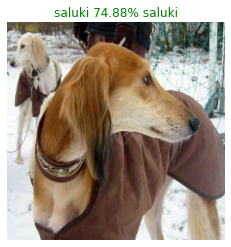

In [59]:
plot_pred(predictions, val_labels, val_images, n=81)

Now we've got ways to get get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. 
* Convert the prediction probabilities to a predicted label. 
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. 

In [60]:
def plot_pred_conf(prediction_probabilities, labels, n=1):

  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_indexes = pred_prob.argsort()[-10:][::-1]

  top_10_pred_values = pred_prob[top_10_indexes]

  top_10_pred_labels = unique_breeds[top_10_indexes]

  top_plot = plt.bar(np.arange(len(top_10_indexes)),
                     top_10_pred_values,
                     color = 'grey')
  
  plt.xticks(np.arange(len(top_10_indexes)),
             labels = top_10_pred_labels,
             rotation = 'vertical')
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

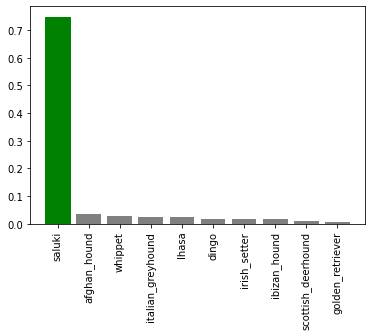

In [61]:
plot_pred_conf(prediction_probabilities=predictions, labels= val_labels,
                n=81)

In [73]:
def plot_images_pred_conf(start = 1):

  i_multiplier = start
  num_rows = 3
  num_cols = 2
  num_images = num_rows*num_cols
  plt.figure(figsize = (10*num_cols, 5*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities = predictions,
              labels = val_labels,
              images = val_images, n = i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities = predictions,
                   labels = val_labels,
                   n = i+i_multiplier)
  plt.tight_layout(h_pad = 0.1)
  plt.show()

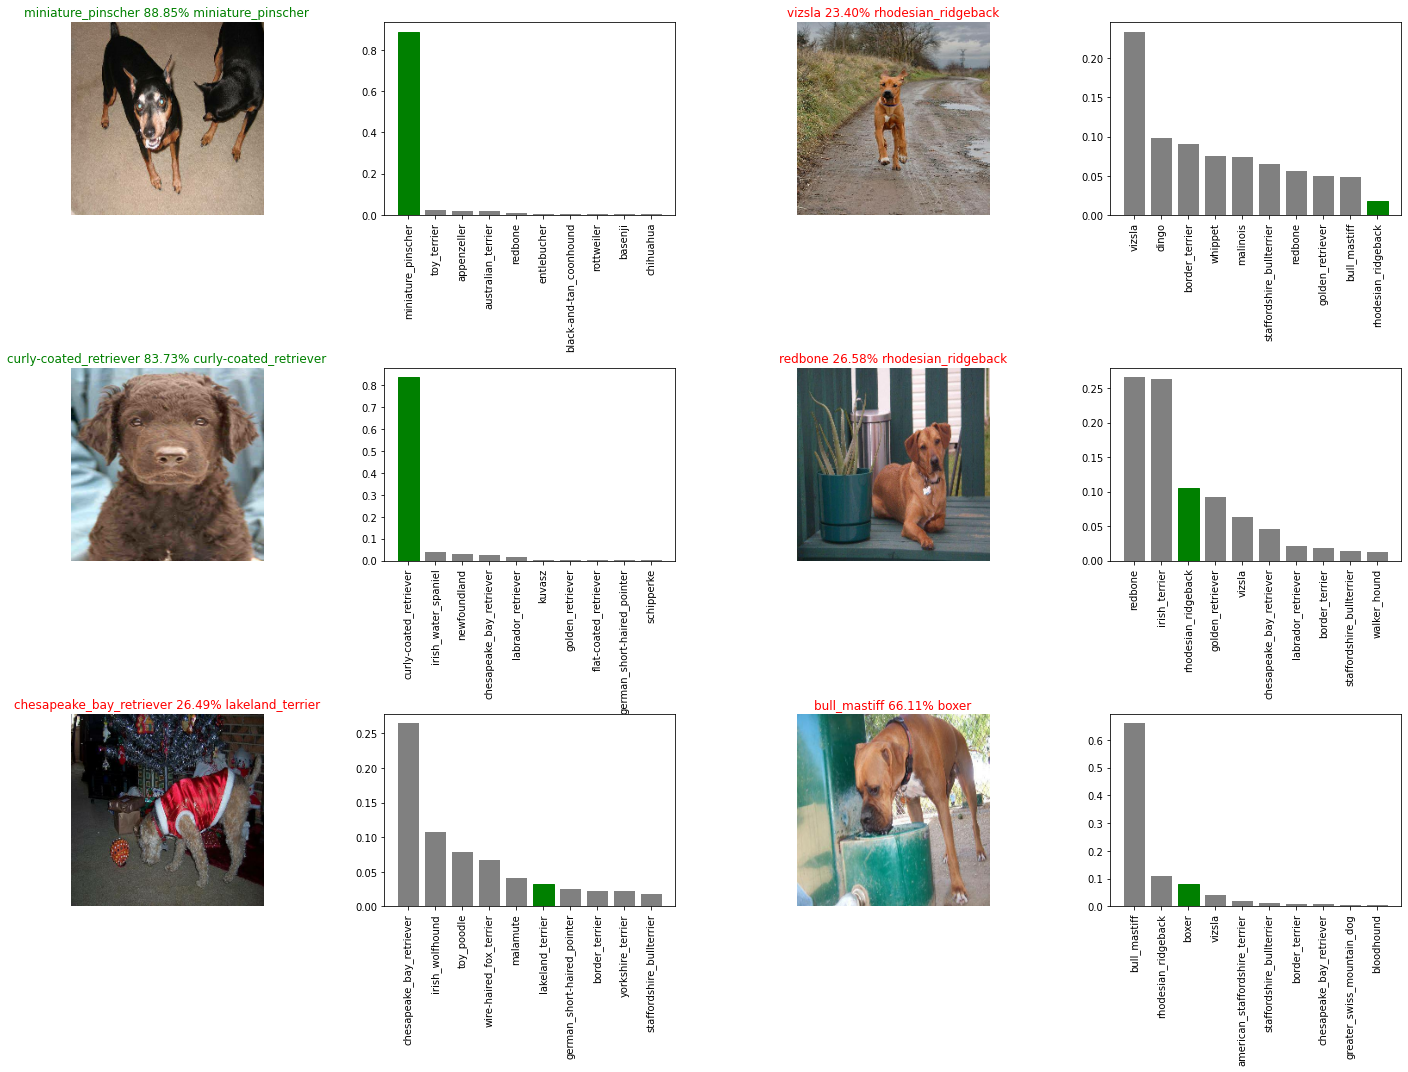

In [74]:
plot_images_pred_conf(start = 10)

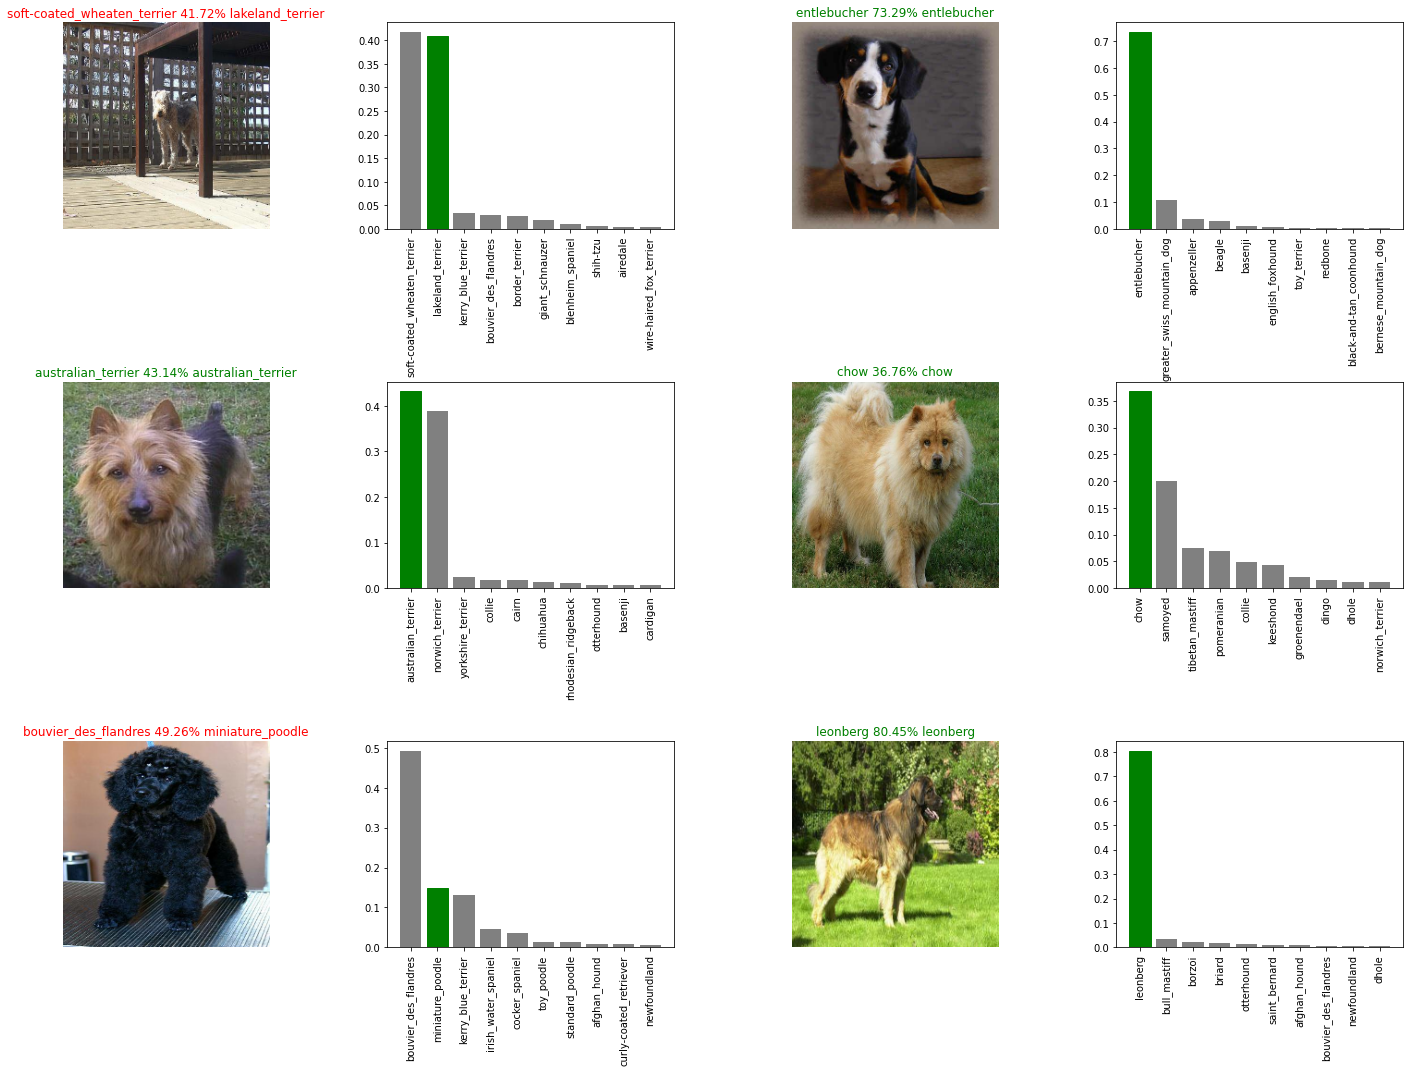

In [75]:
plot_images_pred_conf(start=20)

In [77]:
def get_pred_labels_list(prediction_probabilities):
  '''
   Takes predicted probabilities and returns a list of predicted labels.
  '''
  pred_labels = []
  for i in range(len(prediction_probabilities)):
    label = get_pred_label(prediction_probabilities[i])
    pred_labels.append(label)
  return pred_labels

In [80]:
pred_labels = get_pred_labels_list(predictions)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
confusion_matrix(val_labels,pred_labels)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 3]])

In [88]:
import seaborn as sns
def plot_conf_mat(conf_mat):
  '''
  Plot confusion matrix.
  '''
  fig,ax = plt.subplots(figsize = (50,50))

  sns.heatmap(conf_mat, annot=True,
              cbar = False)
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()

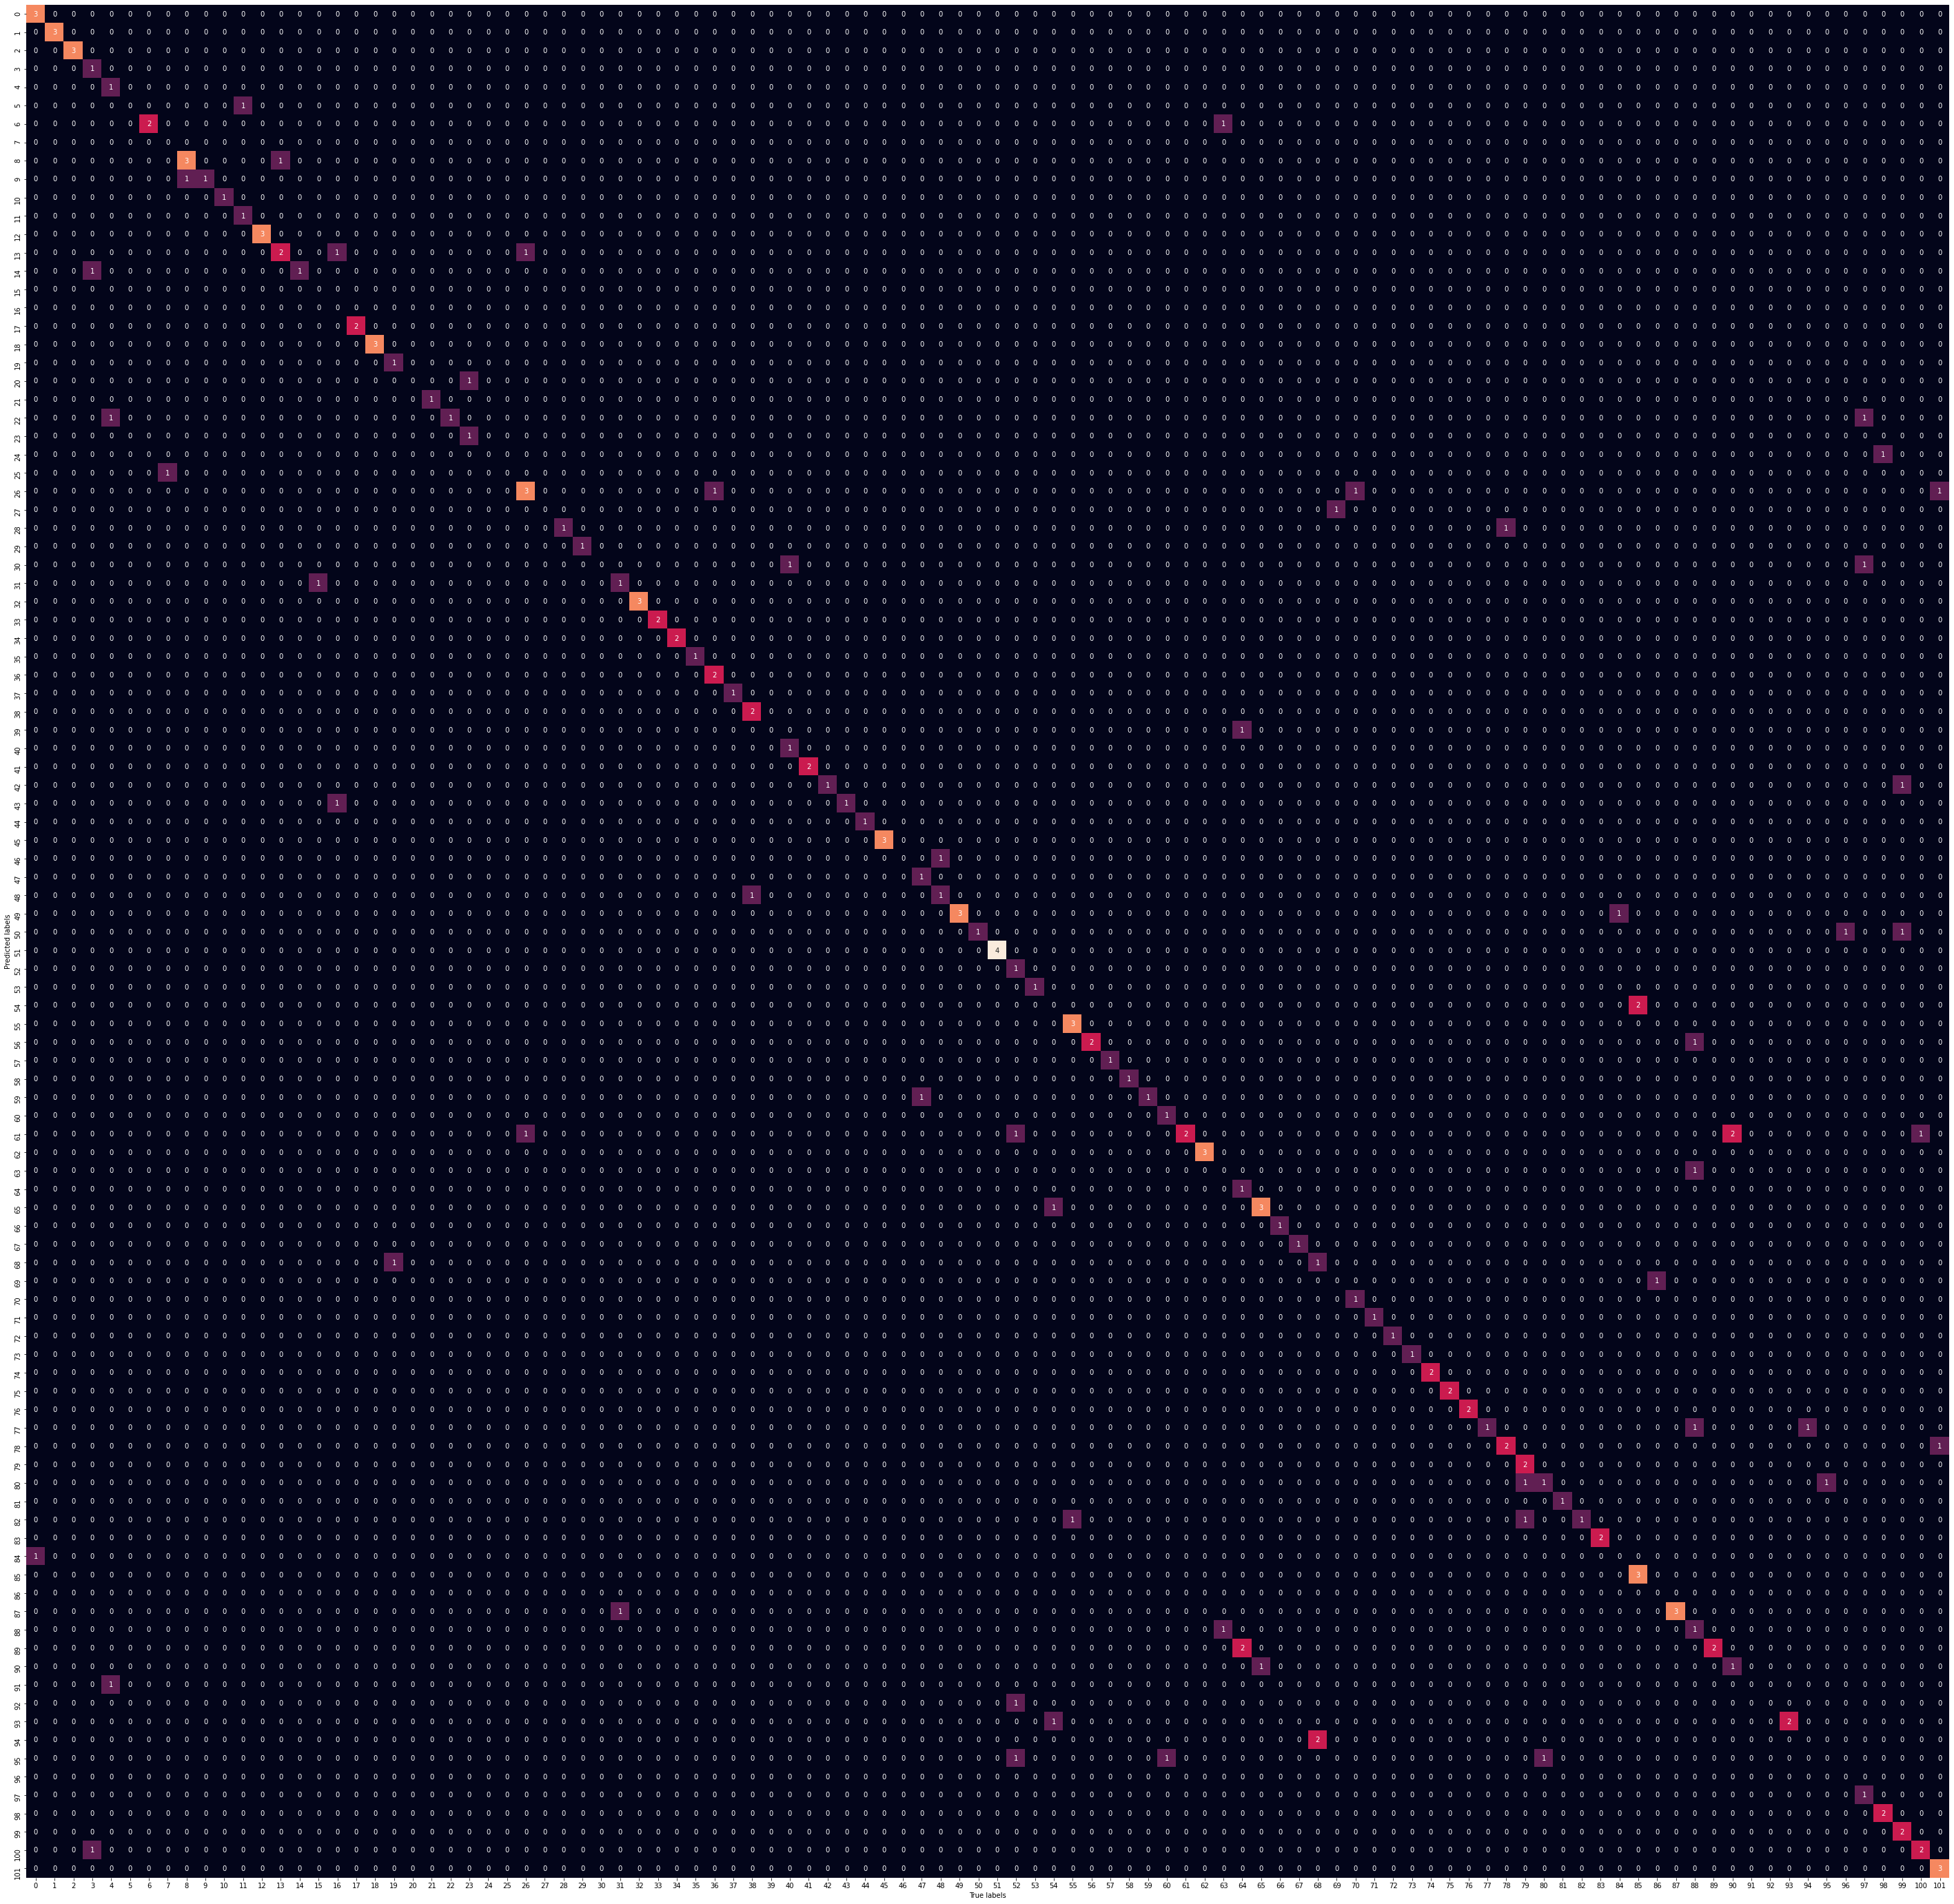

In [89]:
conf_mat = confusion_matrix(val_labels,pred_labels)
plot_conf_mat(conf_mat)

In [92]:
print(classification_report(val_labels, pred_labels, zero_division=1))

                                precision    recall  f1-score   support

                 affenpinscher       0.75      1.00      0.86         3
                  afghan_hound       1.00      1.00      1.00         3
           african_hunting_dog       1.00      1.00      1.00         3
                      airedale       0.33      1.00      0.50         1
american_staffordshire_terrier       0.33      1.00      0.50         1
                   appenzeller       1.00      0.00      0.00         1
            australian_terrier       1.00      0.67      0.80         3
                       basenji       0.00      1.00      0.00         0
                        basset       0.75      0.75      0.75         4
                        beagle       1.00      0.50      0.67         2
            bedlington_terrier       1.00      1.00      1.00         1
          bernese_mountain_dog       0.50      1.00      0.67         1
              blenheim_spaniel       1.00      1.00      1.00  

## Saving and reloading a trained model

In [93]:
def save_model(model,suffix = 'None'):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  modeldir = os.path.join('drive/My Drive/Data Science/models',
                       datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  model_path = modeldir + '-' + suffix + '.h5' # save format of model
  print(f'Saving model to: {model_path}')
  model.save(model_path)
  return model_path

In [98]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={'KerasLayer': hub.KerasLayer})
  return model

In [95]:
save_model(model, suffix = '1000-images-moboleenatV2-Adam')

Saving model to: drive/My Drive/Data Science/models/20200723-195701-1000-images-moboleenatV2-Adam.h5


'drive/My Drive/Data Science/models/20200723-195701-1000-images-moboleenatV2-Adam.h5'

In [99]:
loaded_1000_images_model = load_model('drive/My Drive/Data Science/models/20200723-195701-1000-images-moboleenatV2-Adam.h5')

Loading saved model from: drive/My Drive/Data Science/models/20200723-195701-1000-images-moboleenatV2-Adam.h5


In [100]:
# Evaluate the pre-saved model
model.evaluate(valid_data)

7/7 [==============================] - 1s 120ms/step - loss: 1.2491 - accuracy: 0.6850


[1.2490748167037964, 0.6850000023841858]

In [101]:
# Evaluate the loaded model
loaded_1000_images_model.evaluate(valid_data)

7/7 [==============================] - 1s 127ms/step - loss: 1.2491 - accuracy: 0.6850


[1.2490748167037964, 0.6850000023841858]

## Training a big dog model 🐶 (on the full data)